# Measuring the performance of a DNN on data.csv

## Import all dependencies

In [32]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from keras import models, layers
import matplotlib.pyplot as plt

## Retrieve and transform the data

In [33]:
ufc_data_location = "../ufcdata/preprocessed_data.csv"

ufc_data = pd.read_csv(ufc_data_location)

In [34]:
ufc_data

,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,...,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,Red,True,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,...,0,0,1,0,0,0,0,1,0,0
1,Red,True,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,...,0,0,1,0,0,0,0,0,1,0
2,Red,False,3,0.0,3.0,0.0,15.354839,11.322581,6.741935,4.387097,...,0,0,1,0,0,0,0,1,0,0
3,Blue,False,3,0.0,4.0,0.0,17.000000,14.000000,13.750000,11.000000,...,0,0,0,0,0,1,0,1,0,0
4,Blue,False,3,0.0,1.0,0.0,17.000000,14.500000,2.500000,2.000000,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3587,Red,False,1,0.0,1.0,0.0,1.000000,1.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,1,0
3588,Red,False,1,0.0,1.0,0.0,0.000000,0.000000,1.000000,1.000000,...,0,0,1,0,0,0,0,1,0,0
3589,Red,True,1,0.0,2.0,0.0,0.500000,0.500000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,1,0
3590,Red,False,1,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,1,0


In [35]:
# Dropping all rows that have a draw
ufc_data = ufc_data[ufc_data.Winner != "Draw"].reset_index(drop=True)
ufc_data

,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,...,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,Red,True,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,...,0,0,1,0,0,0,0,1,0,0
1,Red,True,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,...,0,0,1,0,0,0,0,0,1,0
2,Red,False,3,0.0,3.0,0.0,15.354839,11.322581,6.741935,4.387097,...,0,0,1,0,0,0,0,1,0,0
3,Blue,False,3,0.0,4.0,0.0,17.000000,14.000000,13.750000,11.000000,...,0,0,0,0,0,1,0,1,0,0
4,Blue,False,3,0.0,1.0,0.0,17.000000,14.500000,2.500000,2.000000,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3587,Red,False,1,0.0,1.0,0.0,1.000000,1.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,1,0
3588,Red,False,1,0.0,1.0,0.0,0.000000,0.000000,1.000000,1.000000,...,0,0,1,0,0,0,0,1,0,0
3589,Red,True,1,0.0,2.0,0.0,0.500000,0.500000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,1,0
3590,Red,False,1,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,1,0


In [50]:
"""
In this version of the DNN I am just training using the numerical
columns
"""
numerical_cols = []
categorical_cols = []
for col, col_type in zip(ufc_data.dtypes.keys(), ufc_data.dtypes):
    if col_type == "float64" or col_type == "int64":
        numerical_cols.append(col)
    else:
        categorical_cols.append(col)
        
print(numerical_cols)

['no_of_rounds', 'B_current_lose_streak', 'B_current_win_streak', 'B_draw', 'B_avg_BODY_att', 'B_avg_BODY_landed', 'B_avg_CLINCH_att', 'B_avg_CLINCH_landed', 'B_avg_DISTANCE_att', 'B_avg_DISTANCE_landed', 'B_avg_GROUND_att', 'B_avg_GROUND_landed', 'B_avg_HEAD_att', 'B_avg_HEAD_landed', 'B_avg_KD', 'B_avg_LEG_att', 'B_avg_LEG_landed', 'B_avg_PASS', 'B_avg_REV', 'B_avg_SIG_STR_att', 'B_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct', 'B_avg_SUB_ATT', 'B_avg_TD_att', 'B_avg_TD_landed', 'B_avg_TD_pct', 'B_avg_TOTAL_STR_att', 'B_avg_TOTAL_STR_landed', 'B_longest_win_streak', 'B_losses', 'B_avg_opp_BODY_att', 'B_avg_opp_BODY_landed', 'B_avg_opp_CLINCH_att', 'B_avg_opp_CLINCH_landed', 'B_avg_opp_DISTANCE_att', 'B_avg_opp_DISTANCE_landed', 'B_avg_opp_GROUND_att', 'B_avg_opp_GROUND_landed', 'B_avg_opp_HEAD_att', 'B_avg_opp_HEAD_landed', 'B_avg_opp_KD', 'B_avg_opp_LEG_att', 'B_avg_opp_LEG_landed', 'B_avg_opp_PASS', 'B_avg_opp_REV', 'B_avg_opp_SIG_STR_att', 'B_avg_opp_SIG_STR_landed', 'B_avg_opp_SIG_STR

In [37]:
# Create the features and labels column
labels = ufc_data["Winner"]
le = LabelEncoder()
le.fit(labels)

features = ufc_data[numerical_cols]
labels = le.transform(labels)

In [38]:
labels

array([1, 1, 1, ..., 1, 1, 1])

In [39]:
# Retrieving train and test splits
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.8)
X_train = X_train.values
X_test = X_test.values
print("X_train length {}, y_train length {}".format(X_train.shape, y_train.shape))
print("X_test length {}, y_test length {}".format(X_test.shape, y_test.shape))

X_train length (2873, 158), y_train length (2873,)
X_test length (719, 158), y_test length (719,)


## Create a model

In [40]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(158,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               20352     
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 129       
Total params: 53,505
Trainable params: 53,505
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [42]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Train on 2873 samples, validate on 719 samples
Epoch 1/50
2873/2873 [==============================] - 1s 185us/step - loss: 2.9112 - accuracy: 0.5868 - val_loss: 1.1058 - val_accuracy: 0.5522
Epoch 2/50
2873/2873 [==============================] - 0s 119us/step - loss: 0.8053 - accuracy: 0.6408 - val_loss: 1.2179 - val_accuracy: 0.6412
Epoch 3/50
2873/2873 [==============================] - 0s 75us/step - loss: 0.8066 - accuracy: 0.6237 - val_loss: 0.7199 - val_accuracy: 0.5981
Epoch 4/50
2873/2873 [==============================] - 0s 75us/step - loss: 0.7680 - accuracy: 0.6384 - val_loss: 0.7250 - val_accuracy: 0.6384
Epoch 5/50
2873/2873 [==============================] - 0s 79us/step - loss: 0.6451 - accuracy: 0.6596 - val_loss: 0.8753 - val_accuracy: 0.6453
Epoch 6/50
2873/2873 [==============================] - 0s 75us/step - loss: 0.6922 - accuracy: 0.6394 - val_loss: 0.6935 - val_accuracy: 0.5953
Epoch 7/50
2873/2873 [==============================] - 0s 70us/step - loss: 0.63

## Evaluate the model

/Users/jamesperalta/PythonEnvs/ENSF-519/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


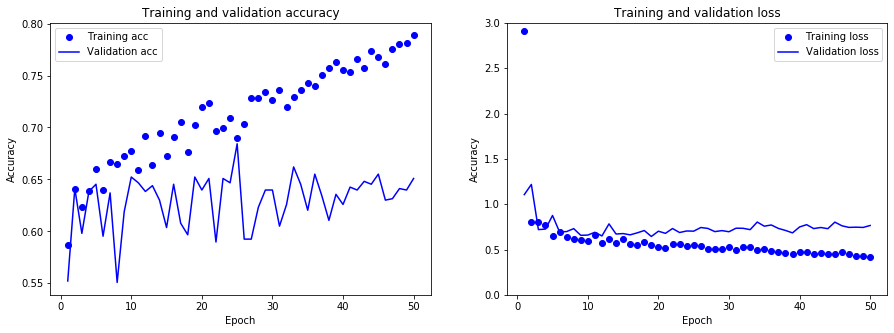

In [49]:
plot_training_results(history)

## Summary of DNN on preprocessed_data.csv:

- This model was trained on 158 columns without any dimensinality reduction performed.
- With the raw preprocessed data, it seems like the DNN's is not strong enough to model all of these columns because we can't acheive higher than 80% on the training data. Usually these models should be able to overfit on the training data. We will need to perform some dimensionality reduction.

# Measuring the performance of a DNN on preprocessed_ratio_data.csv

# Helper functions

In [48]:
def plot_training_results(history_obj):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)

    fig, (accuracy_axis, loss_axis) = plt.subplots(1, 2, figsize=(15, 5))

    accuracy_axis.plot(epochs, acc, 'bo', label='Training acc')
    accuracy_axis.plot(epochs, val_acc, 'b', label='Validation acc')
    accuracy_axis.set_title('Training and validation accuracy')
    accuracy_axis.set_ylabel('Accuracy')
    accuracy_axis.set_xlabel('Epoch')
    accuracy_axis.legend()

    loss_axis.plot(epochs, loss, 'bo', label='Training loss')
    loss_axis.plot(epochs, val_loss, 'b', label='Validation loss')
    loss_axis.set_title('Training and validation loss')
    loss_axis.set_ylim(0, 3)
    loss_axis.set_ylabel('Accuracy')
    loss_axis.set_xlabel('Epoch')
    loss_axis.legend()
    fig.show()